# HW \#4 (Linear Classification)
    주어진 데이터셋에 대해서 Classification을 Cross-entropy cost function과 Softmax cost fucntion으로 수행하시오
### 제출기한: 2024.04.10

In [2]:
import numpy as np
import autograd
import matplotlib.pyplot as plt
import pandas as pd
import itertools

## Dataset

In [4]:
# load in data
datapath = './'
csvname = datapath + '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

### HW  (1)

위의 데이터셋에 대하여 1) cross-entropy cost 함수를 정의하고, 2) gradient descent 알고리즘으로 솔류션을 구하고, 3) 그래프로 잘 뷴류가 되었는지 확인하시오

In [5]:
def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

In [6]:
def sigmoid(t):
    return 1/(1 + np.exp(-t))

def cross_entropy(w):
    a = sigmoid(model(x,w))

    ind = np.argwhere(y==0)[: ,1]
    cost = -np.sum(np.log(1 - a[:, ind]))

    ind = np.argwhere(y==1)[:, 1]
    cost -= np.sum(np.log(a[:, ind]))

    return cost/y.size

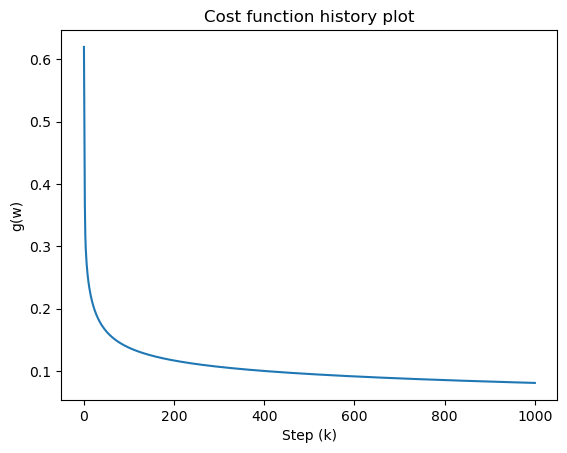

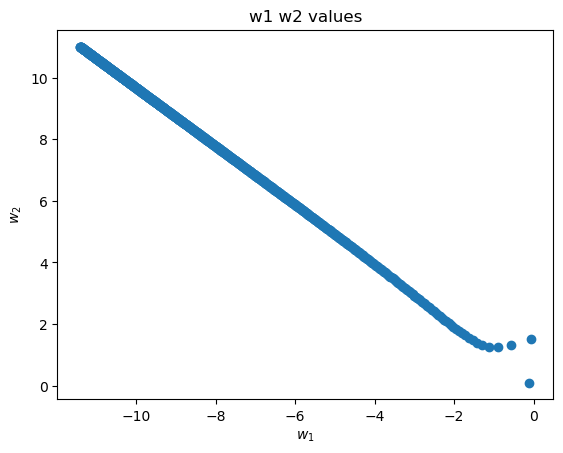

In [7]:
from autograd import grad 
import autograd.numpy as np 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

# run gradient descent to minimize g(w)
g = cross_entropy; 
w = 0.1*np.random.randn(2,1); 
max_its = 1000; 
alpha_choice = 2;
w_history, cost_history = gradient_descent(g,alpha_choice,max_its,w)

plt.plot(cost_history)
plt.title('Cost function history plot')
plt.xlabel('Step (k)')
plt.ylabel('g(w)')
plt.show()

w1 = []
w2 = []
[w1.append(a[0]) for a in w_history]
[w2.append(a[1]) for a in w_history]

plt.plot(w1, w2, 'o')
plt.title('w1 w2 values')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()


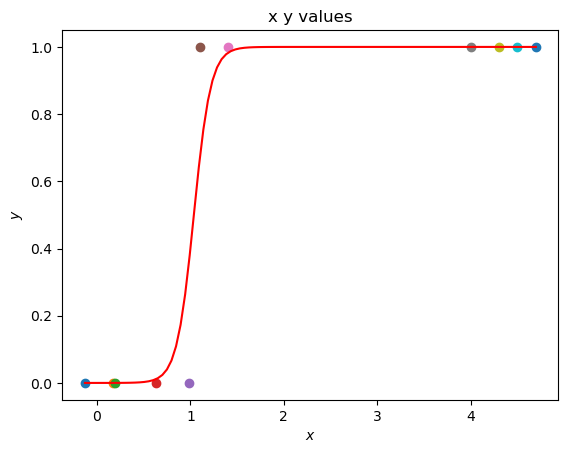

In [22]:
x_range = np.linspace(min(x.flatten()), max(x.flatten()), 100).reshape(-1,1)

prediction = sigmoid(x_range * w_history[-1][1] + w_history[-1][0])

plt.plot(x, y, 'o')
plt.plot(x_range, prediction, 'r')
plt.title('x y values')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

### HW  (2)

위의 데이터셋에 대하여 1) Softmax cost 함수를 정의하고, 2) gradient descent 알고리즘으로 솔류션을 구하고, 3) 그래프로 잘 뷴류가 되었는지 확인하시오

In [8]:
# load in data
datapath = './'
csvname = datapath + '2d_classification_data_v2_softmax.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

In [9]:
def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

def tanh(t):
    return (2 / (1 + np.exp(-t))) - 1

def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost / float(np.size(y))

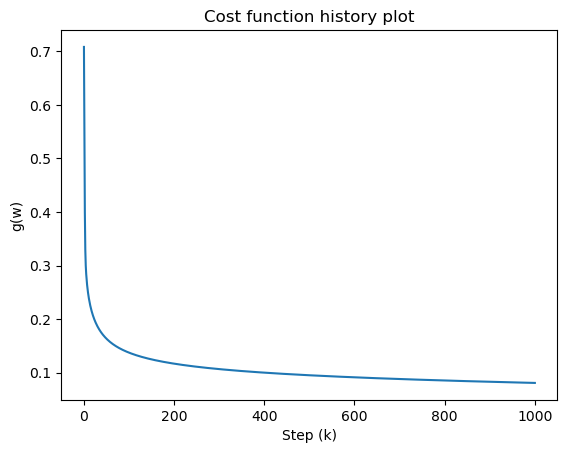

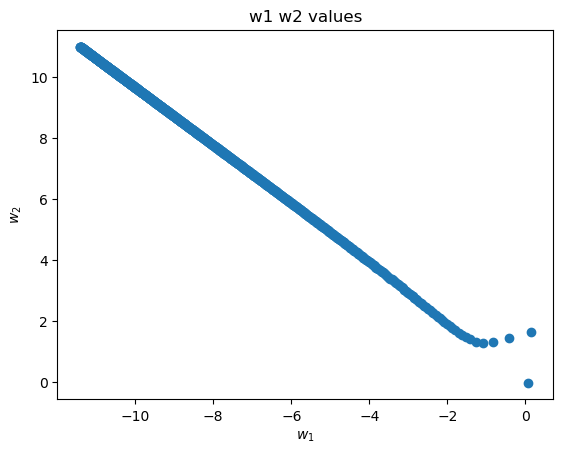

In [10]:
from autograd import grad 
import autograd.numpy as np 
import matplotlib.pyplot as plt

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

# run gradient descent to minimize g(w)
g = softmax; 
w = 0.1*np.random.randn(2,1); 
max_its = 1000; 
alpha_choice = 2;
w_history, cost_history = gradient_descent(g,alpha_choice,max_its,w)

plt.plot(cost_history)
plt.title('Cost function history plot')
plt.xlabel('Step (k)')
plt.ylabel('g(w)')
plt.show()

w1 = []
w2 = []
[w1.append(a[0]) for a in w_history]
[w2.append(a[1]) for a in w_history]

plt.plot(w1, w2, 'o')
plt.title('w1 w2 values')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()

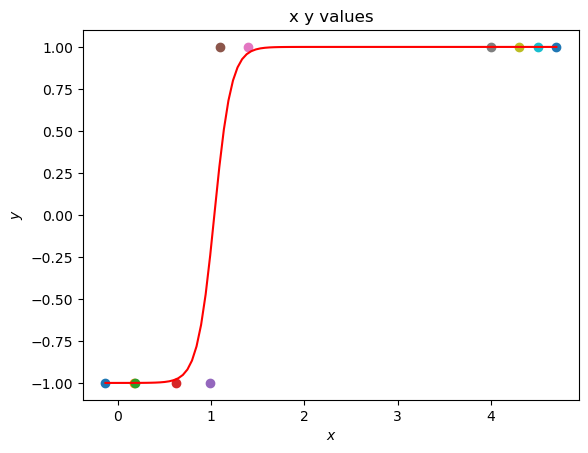

In [33]:
x_range = np.linspace(min(x.flatten()), max(x.flatten()), 100).reshape(-1,1)

prediction = tanh(x_range * w_history[-1][1] + w_history[-1][0])
plt.plot(x, y, 'o')
plt.plot(x_range, prediction, 'r')
plt.title('x y values')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()